In [1]:
import numpy as np
import constants as C
import edl
import kinetics as kin
import plotting 

%matplotlib widget

In [2]:
default_gamma = 8
default_ph = 11
default_equilibrium_potential_vshe = -59e-3 * default_ph
default_concentration_molar = 100e-3

au_potential_range_vrhe = np.linspace(-0.8, -0.4, 100)
pt_potential_range_vrhe = np.linspace(-0.15, 0.05, 100)


Sweep from -1.52V to -1.92V. Maximum relative residual: 7.16559e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 7.16559e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 2.38749e-04.
Sweep from -1.52V to -1.52V. Maximum relative residual: 2.38749e-04.
Sweep from -1.52V to -1.92V. Maximum relative residual: 3.26765e-04.
Sweep from -1.52V to -1.52V. Maximum relative residual: 3.26765e-04.
Sweep from -1.52V to -1.92V. Maximum relative residual: 2.95880e-05.
Sweep from -1.52V to -1.52V. Maximum relative residual: 2.95880e-05.


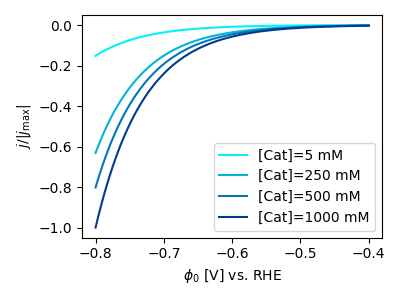

In [3]:
## Au -- Goyal/Koper concentration series
cat_conc_range = [5e-3, 250e-3, 500e-3, 1000e-3] #np.logspace(-2.5, -1, 4) 

currents = []
for i, c_cat in enumerate(cat_conc_range): 
    model = edl.Abrashkin(c_cat, default_gamma, default_gamma)
    j = kin.frumkin_corrected_current(model, au_potential_range_vrhe + default_equilibrium_potential_vshe, C.AU_PZC_SHE_V, default_ph, include_cat=True)
    currents.append(j)
currents = np.array(currents)
currents /= np.max(np.abs(currents))

fig, ax = plotting.plot_current(currents, au_potential_range_vrhe, cat_conc_range, parameter_symbol=r'[Cat]', parameter_scaling=1e3, parameter_unit='mM')

Sweep from -1.52V to -1.92V. Maximum relative residual: 1.26477e-05.
Sweep from -1.52V to -1.52V. Maximum relative residual: 1.26477e-05.
Sweep from -1.52V to -1.92V. Maximum relative residual: 1.08287e-05.
Sweep from -1.52V to -1.52V. Maximum relative residual: 1.08287e-05.
Sweep from -1.52V to -1.92V. Maximum relative residual: 9.62995e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 9.62995e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 2.78337e-04.
Sweep from -1.52V to -1.52V. Maximum relative residual: 2.78337e-04.
Sweep from -1.52V to -1.92V. Maximum relative residual: 2.95880e-05.
Sweep from -1.52V to -1.52V. Maximum relative residual: 2.95880e-05.


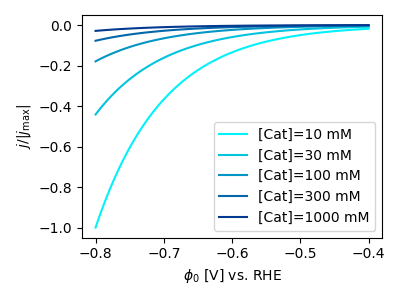

In [10]:
# "Au nanostructure" -- Bender ion size series
cat_conc_range = [10e-3, 30e-3, 100e-3, 300e-3, 1000e-3] #np.logspace(-2.5, -1, 4) 

currents = []
for i, cat_conc in enumerate(cat_conc_range): 
    model = edl.Abrashkin(cat_conc, default_gamma, default_gamma)
    j = kin.edl_transport_limited_current(model, au_potential_range_vrhe + default_equilibrium_potential_vshe, C.AU_PZC_SHE_V, default_ph)
    currents.append(j)
currents = np.array(currents)
currents /= np.max(np.abs(currents))

fig, ax = plotting.plot_current(currents, au_potential_range_vrhe, cat_conc_range, parameter_symbol=r'[Cat]', parameter_scaling=1e3, parameter_unit='mM')

Sweep from -1.60V to -1.80V. Maximum relative residual: 2.72084e-05.
Sweep from -1.60V to -1.60V. Maximum relative residual: 2.72084e-05.
Sweep from -1.60V to -1.80V. Maximum relative residual: 5.27304e-06.
Sweep from -1.60V to -1.60V. Maximum relative residual: 5.27304e-06.
Sweep from -1.60V to -1.80V. Maximum relative residual: 3.02586e-05.
Sweep from -1.60V to -1.60V. Maximum relative residual: 3.02586e-05.
Sweep from -1.60V to -1.80V. Maximum relative residual: 3.91787e-06.
Sweep from -1.60V to -1.60V. Maximum relative residual: 3.42761e-06.
Sweep from -1.60V to -1.80V. Maximum relative residual: 3.93692e-06.
Sweep from -1.60V to -1.60V. Maximum relative residual: 3.44642e-06.


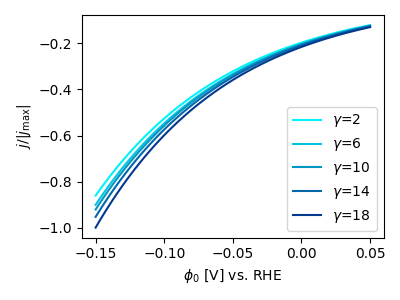

In [4]:
# Pt -- Bender ion size series
gamma_range = [2, 6, 10, 14, 18]

currents = []
for i, gamma in enumerate(gamma_range): 
    model = edl.Abrashkin(default_concentration_molar, gamma, gamma)
    j = kin.edl_transport_limited_current(model, pt_potential_range_vrhe + default_equilibrium_potential_vshe, C.PT_PZC_SHE_V, default_ph)
    currents.append(j)
currents = np.array(currents)
currents /= np.max(np.abs(currents))

fig, ax = plotting.plot_current(currents, pt_potential_range_vrhe, gamma_range, parameter_symbol=r'$\gamma$')

Sweep from -1.52V to -1.92V. Maximum relative residual: 5.64173e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 4.93990e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 2.59602e-05.
Sweep from -1.52V to -1.52V. Maximum relative residual: 2.59602e-05.
Sweep from -1.52V to -1.92V. Maximum relative residual: 9.14758e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 9.14758e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 4.81504e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 3.25266e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 4.70516e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 3.27554e-06.


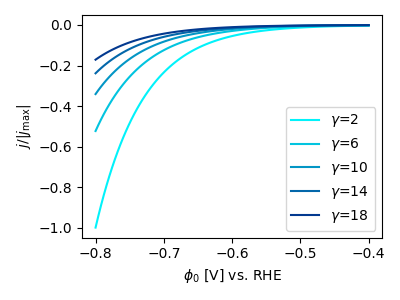

In [5]:
# Au -- Bender ion size series
gamma_range = [2, 6, 10, 14, 18]

currents = []
for i, gamma in enumerate(gamma_range): 
    model = edl.Abrashkin(default_concentration_molar, gamma, gamma)
    j = kin.frumkin_corrected_current(model, au_potential_range_vrhe + default_equilibrium_potential_vshe, C.AU_PZC_SHE_V, default_ph, include_cat=True)
    currents.append(j)
currents = np.array(currents)
currents /= np.max(np.abs(currents))

fig, ax = plotting.plot_current(currents, au_potential_range_vrhe, gamma_range, parameter_symbol=r'$\gamma$')

Sweep from -1.52V to -1.92V. Maximum relative residual: 5.64173e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 4.93990e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 2.59602e-05.
Sweep from -1.52V to -1.52V. Maximum relative residual: 2.59602e-05.
Sweep from -1.52V to -1.92V. Maximum relative residual: 9.14758e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 9.14758e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 4.81504e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 3.25266e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 4.70516e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 3.27554e-06.


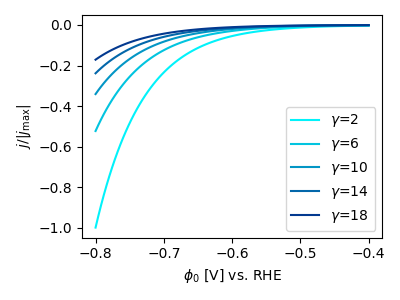

In [6]:
# Au -- Bender ion size series -- No cations
gamma_range = [2, 6, 10, 14, 18]

currents = []
for i, gamma in enumerate(gamma_range): 
    model = edl.Abrashkin(default_concentration_molar, gamma, gamma)
    j = kin.frumkin_corrected_current(model, au_potential_range_vrhe + default_equilibrium_potential_vshe, C.AU_PZC_SHE_V, default_ph, include_cat=False)
    currents.append(j)
currents = np.array(currents)
currents /= np.max(np.abs(currents))

fig, ax = plotting.plot_current(currents, au_potential_range_vrhe, gamma_range, parameter_symbol=r'$\gamma$')

Sweep from -1.52V to -1.92V. Maximum relative residual: 5.64173e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 4.93990e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 2.59602e-05.
Sweep from -1.52V to -1.52V. Maximum relative residual: 2.59602e-05.
Sweep from -1.52V to -1.92V. Maximum relative residual: 9.14758e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 9.14758e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 4.81504e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 3.25266e-06.
Sweep from -1.52V to -1.92V. Maximum relative residual: 4.70516e-06.
Sweep from -1.52V to -1.52V. Maximum relative residual: 3.27554e-06.


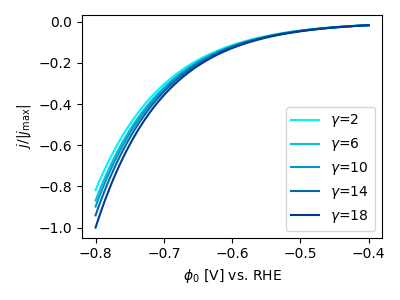

In [7]:
# "Au nanostructure" -- Bender ion size series
gamma_range = [2, 6, 10, 14, 18]

currents = []
for i, gamma in enumerate(gamma_range): 
    model = edl.Abrashkin(default_concentration_molar, gamma, gamma)
    j = kin.edl_transport_limited_current(model, au_potential_range_vrhe + default_equilibrium_potential_vshe, C.AU_PZC_SHE_V, default_ph)
    currents.append(j)
currents = np.array(currents)
currents /= np.max(np.abs(currents))

fig, ax = plotting.plot_current(currents, au_potential_range_vrhe, gamma_range, parameter_symbol=r'$\gamma$')

Sweep from -1.06V to -1.66V. Maximum relative residual: 3.61630e-05.
Sweep from -1.06V to -1.06V. Maximum relative residual: 1.14328e-05.
Sweep from -1.12V to -1.72V. Maximum relative residual: 3.59132e-05.
Sweep from -1.12V to -1.12V. Maximum relative residual: 2.00569e-06.
Sweep from -1.18V to -1.78V. Maximum relative residual: 3.63756e-05.
Sweep from -1.18V to -1.18V. Maximum relative residual: 2.68597e-06.
Sweep from -1.24V to -1.84V. Maximum relative residual: 3.63579e-05.
Sweep from -1.24V to -1.24V. Maximum relative residual: 2.77531e-05.


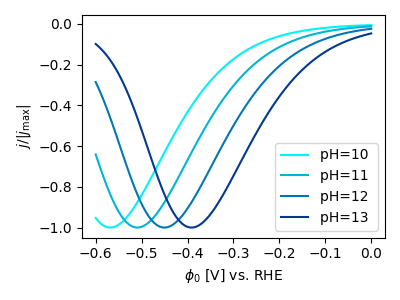

In [15]:
## Goyal&Koper -- pH series
ph_range = [10, 11, 12, 13]
potential_range_vrhe = np.linspace(-0.6, 0.0, 100)

currents = []
for i, ph in enumerate(ph_range): 
    model = edl.Abrashkin(default_concentration_molar, 60, 60)

    equilibrium_potential_vshe = -59e-3 * ph
        
    j = kin.frumkin_corrected_current(model, equilibrium_potential_vshe + potential_range_vrhe, C.AU_PZC_SHE_V, ph, include_cat=False)
    currents.append(j)
currents = np.array(currents)
currents /= np.max(np.abs(currents))

fig, ax = plotting.plot_current(currents, potential_range_vrhe, ph_range, parameter_symbol='pH')